In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
import statsmodels.api as sm
from tqdm.notebook import tqdm

In [2]:
df = pd.read_csv(
    "https://github.com/fbranda/monkeypox-opendata/raw/main/ECDC-WHO/Epicurves/epicurve_by_country.csv",
    parse_dates=["Date"], index_col="Date"
)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1494 entries, 2022-06-20 to 2022-08-09
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  1494 non-null   object
 1   Cases    1494 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 35.0+ KB


In [4]:
df.Country.unique().size

36

In [5]:
WARNINGS = {
    "country": [],
    "1st cases": [],
    "max incidence": [],
    "missing dates": [],
    "length": []
}
DATA = {
    "country": [],
    "1st cases": [],
    "max incidence": [],
    "missing dates": [],
    "length": [],
    "max_date": [],
}

for c in df.Country.unique():
    _df = df[df.Country==c]
    WARNINGS["country"].append(c)
    DATA["country"].append(c)
    
    DATA["1st cases"].append(_df.Cases[0])
    if _df.Cases[0] > 1:
        WARNINGS["1st cases"].append("WARN")
    else:
        WARNINGS["1st cases"].append("")
    
    DATA["max incidence"].append(_df.Cases.max())
    if _df.Cases.max() < 10:
        WARNINGS["max incidence"].append("ERR")
    elif _df.Cases.max() < 30:
        WARNINGS["max incidence"].append("WARN")
    else:
        WARNINGS["max incidence"].append("")
        
    missing_dates = pd.date_range(_df.index[0], _df.index[-1]).difference(
        _df.index
    )
    missing_dates_num = missing_dates.size
    DATA["missing dates"].append(missing_dates_num)
    if missing_dates_num:
        WARNINGS["missing dates"].append("WARN")
    else:
        I = _df
        WARNINGS["missing dates"].append("")
        
    WARNINGS["length"].append("")
    DATA["length"].append(np.NaN)
    DATA["max_date"].append(np.datetime64('NaT'))

In [6]:
WARNINGS = pd.DataFrame(WARNINGS)
DATA = pd.DataFrame(DATA)

In [7]:
countries = WARNINGS[WARNINGS["max incidence"]!="ERR"].country

In [8]:
DATA

,country,1st cases,max incidence,missing dates,length,max_date
0,Andorra,1,1,20,NaN,NaT
1,Austria,1,11,29,NaN,NaT
2,Belgium,1,19,5,NaN,NaT
3,Bosnia and Herzegovina,1,1,26,NaN,NaT
4,Bulgaria,1,1,30,NaN,NaT
5,Croatia,1,3,36,NaN,NaT
6,Cyprus,1,1,0,NaN,NaT
7,Czechia,1,3,74,NaN,NaT
8,Denmark,1,9,31,NaN,NaT
9,Estonia,1,2,30,NaN,NaT


In [9]:
WARNINGS

,country,1st cases,max incidence,missing dates,length
0,Andorra,,ERR,WARN,
1,Austria,,WARN,WARN,
2,Belgium,,WARN,WARN,
3,Bosnia and Herzegovina,,ERR,WARN,
4,Bulgaria,,ERR,WARN,
5,Croatia,,ERR,WARN,
6,Cyprus,,ERR,,
7,Czechia,,ERR,WARN,
8,Denmark,,ERR,WARN,
9,Estonia,,ERR,WARN,


In [10]:
DATA[WARNINGS["max incidence"]!="ERR"]

,country,1st cases,max incidence,missing dates,length,max_date
1,Austria,1,11,29,NaN,NaT
2,Belgium,1,19,5,NaN,NaT
11,France,1,106,3,NaN,NaT
13,Germany,1,90,8,NaN,NaT
19,Italy,1,21,42,NaN,NaT
24,Netherlands,1,32,14,NaN,NaT
27,Portugal,1,18,10,NaN,NaT
32,Spain,1,135,3,NaN,NaT
34,Switzerland,1,15,9,NaN,NaT
35,United Kingdom,1,70,48,NaN,NaT


In [11]:
WARNINGS[WARNINGS["max incidence"]!="ERR"]

,country,1st cases,max incidence,missing dates,length
1,Austria,,WARN,WARN,
2,Belgium,,WARN,WARN,
11,France,,,WARN,
13,Germany,,,WARN,
19,Italy,,WARN,WARN,
24,Netherlands,,,WARN,
27,Portugal,,WARN,WARN,
32,Spain,,,WARN,
34,Switzerland,,WARN,WARN,
35,United Kingdom,,,WARN,


In [12]:
def sensitivity_analysis(incidence, country, Ts=28, minT=14,
                sh=None, ra=None,
                mu=None, sd=None,
                muLo=None, muUp=None,
                sdLo=None, sdUp=None,
                CI=.95, pairs=100
               ):
    
    def sh_ra_from_mu_sd(mu, sd):
        sh = mu**2 / sd**2
        ra = mu / sd**2
        return sh, ra
    
    def simulated_I(r, SI, i, T):
        sim = np.zeros(T + SI.size)
        for t in range(T):
            sim[t:(t+SI.size)] += r * I[t] * SI
        return sim[1:(T+1)]
    
    # define mu parameters for Truncated Normal distribution  
    mu_mu = (muUp+muLo)/2
    mu_sd = (muUp-muLo)/2/sps.norm.ppf((1+CI)/2)
    mua, mub = (muLo - mu_mu) / mu_sd, (muUp - mu_mu) / mu_sd
    mu_d = sps.truncnorm(loc=mu_mu, scale=mu_sd, a=mua, b=mub)
    # define sd parameters for Truncated Normal distribution  
    sd_mu = (sdUp+sdLo)/2
    sd_sd = (sdUp-sdLo)/2/sps.norm.ppf((1+CI)/2)
    sda, sdb = (sdLo - sd_mu) / sd_sd, (sdUp - sd_mu) / sd_sd
    sd_d = sps.truncnorm(loc=sd_mu, scale=sd_sd, a=sda, b=sdb)
    # sample (mu,sd) pairs
    mu_rvs = mu_d.rvs(pairs)
    mu_sd = []
    for mu_r in mu_rvs:
        sd_r = sd_d.rvs(1)
        while(sd_r >= mu_r):
            sd_r = sd_d.rvs(1)
        mu_sd.append([mu_r, sd_r[0]])
    mu_sd = np.array(mu_sd)

    RES = []
    
    Ts_range = np.arange(Ts)[minT:]
    
    for T in tqdm(Ts_range):
    
        # init R0 array
        R = np.array([])

        # define incidence time window
        I = incidence.Cases[:T]

        # explored SI
        SIs = []
    
        # method
        # alpha posterior
        a = 1 + np.sum(I[1:])
        # loop through (mu,sd) pairs
        R2 = []
        for ms in tqdm(mu_sd, leave=False):
            # SI gamma distribution
            _s, _r = sh_ra_from_mu_sd(ms[0], ms[1])
            _dis = sps.gamma(a=_s, scale=1/_r)
            _dis_y = _dis.pdf(np.arange(0,T+1))
            # normalize SI distribution to sum to 1
            _dis_y /= _dis_y.sum()
            SIs.append({"x": np.arange(0,T+1), "y": _dis_y})
            # definition of w
            _w = _dis_y
            # beta prior
            b = 1
            for t in range(T)[1:]:
                # lambda
                lam = I[1:t][::-1] * _w[1:t]
                # beta posterior
                b += np.sum(lam)
            # R0 posterior
            R_dis = sps.gamma(a=a, scale=1/b)
            R_median = R_dis.median()
            sim_I = simulated_I(R_median, _w, I, T)
            exog = sm.add_constant(sim_I)
            mod = sm.GLM(I.values, exog, family=sm.families.Poisson())
            res = mod.fit()
            r2 = (res.null_deviance - res.deviance) / res.null_deviance
            R2.append(r2)
        median_R2 = np.median(R2)
        RES.append(median_R2)

    maxR2i = np.argmax(RES)
    with plt.style.context("bmh"):
        fig, ax = plt.subplots(figsize=(12, 5))
        plt.plot(Ts_range, RES)
        plt.plot(Ts_range[maxR2i], RES[maxR2i], "or")
        plt.axvline(Ts_range[maxR2i], ls="--", color="r")
        plt.title(f"{country} best time window {Ts_range[maxR2i]}, deviance $R^2$: {RES[maxR2i]:.3f}")
        plt.xlabel("Days from outbreak")
        plt.ylabel("Deviance R-squared")
        fig.savefig(f"plots/figure4/R2 {country}.pdf", bbox_inches="tight")
        plt.show()

    return (RES, Ts_range[maxR2i])

Austria: missing 29 dates


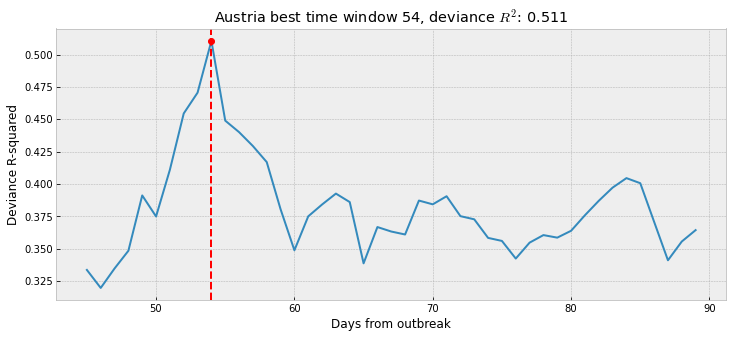

Belgium: missing 5 dates


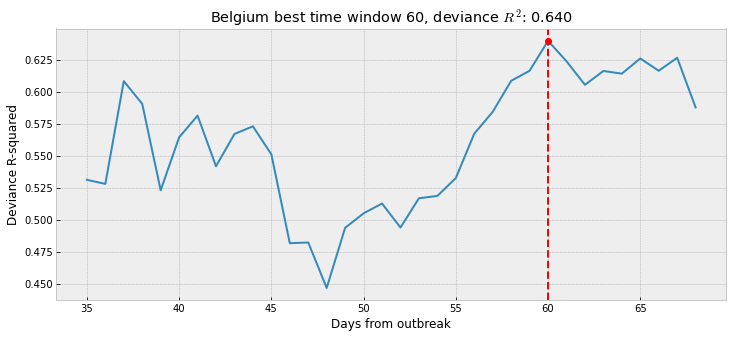

France: missing 3 dates


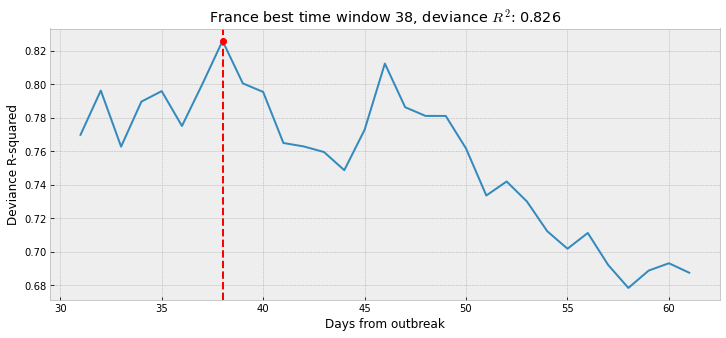

Germany: missing 8 dates


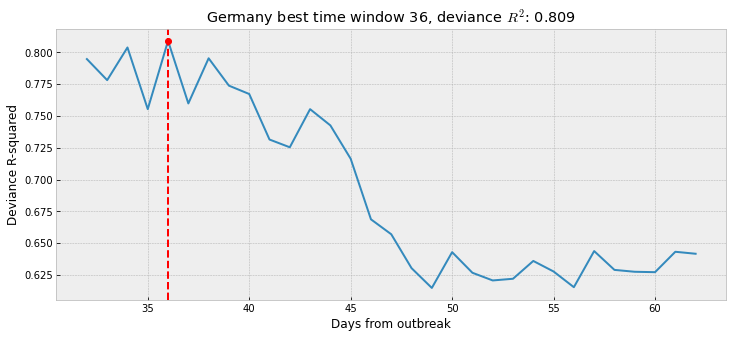

Italy: missing 42 dates


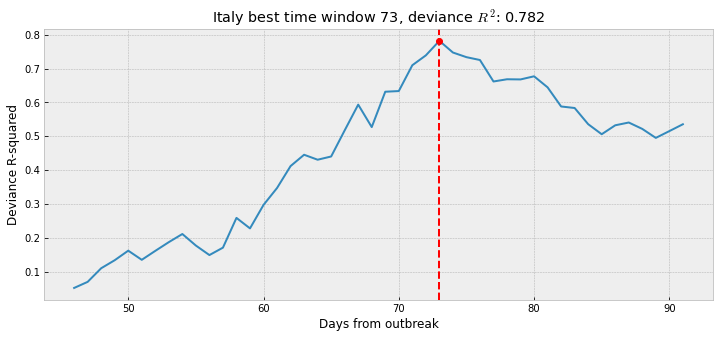

Netherlands: missing 14 dates


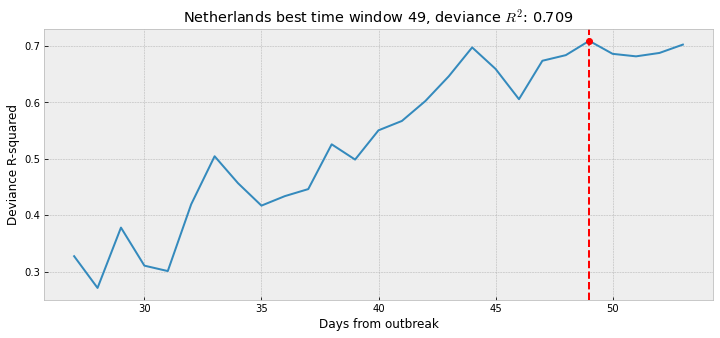

Portugal: missing 10 dates


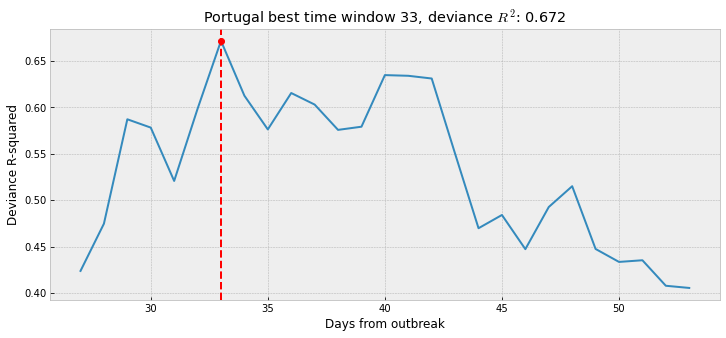

Spain: missing 3 dates


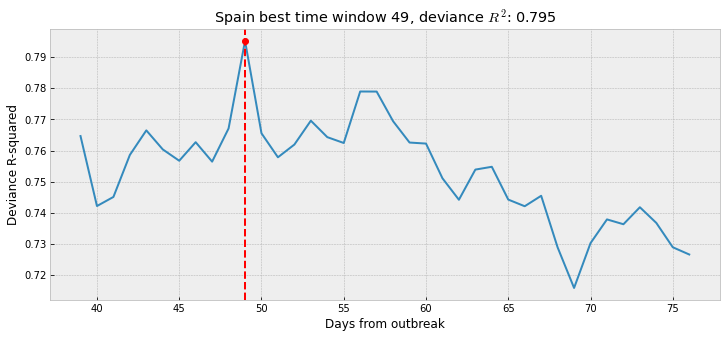

Switzerland: missing 9 dates


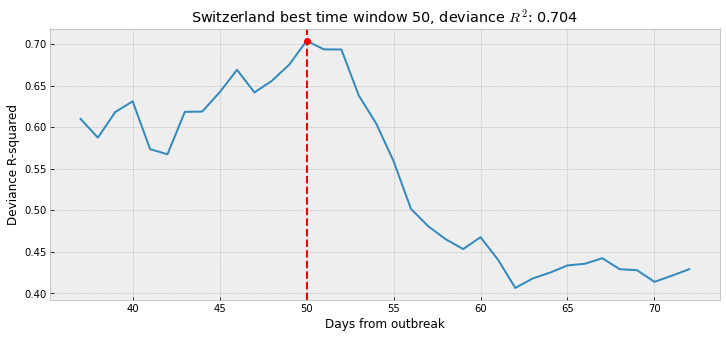

United Kingdom: missing 48 dates


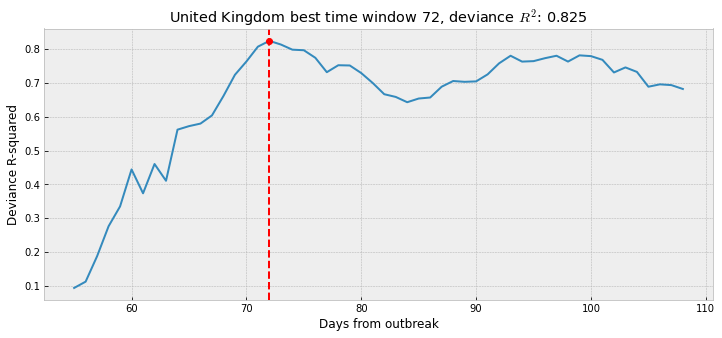

In [13]:
for country in countries:
    _df = df[df.Country==country]
    missing_dates = pd.date_range(_df.index[0], _df.index[-1]).difference(
        _df.index
    )
    missing_dates_num = missing_dates.size
    print(f"{country}: missing {missing_dates_num} dates")
    if missing_dates_num:
        I = _df.resample("D").mean().interpolate(method="pchip")
        I["Cases"] = np.ceil(I.Cases).astype(int)
    else:
        I = _df

    maxT = I.reset_index().Cases.idxmax()
    minT = maxT - maxT//2
    index = sensitivity_analysis(
        I, country,
        Ts=I.reset_index().Cases.idxmax(),
        minT=minT,
        muLo=7.55, muUp=17.29,
        sdLo=2.88, sdUp=7.26
    )
    DATA.loc[DATA.country==country, "length"] = index[1]
    DATA.loc[DATA.country==country, "max_date"] = I.index[index[1]]

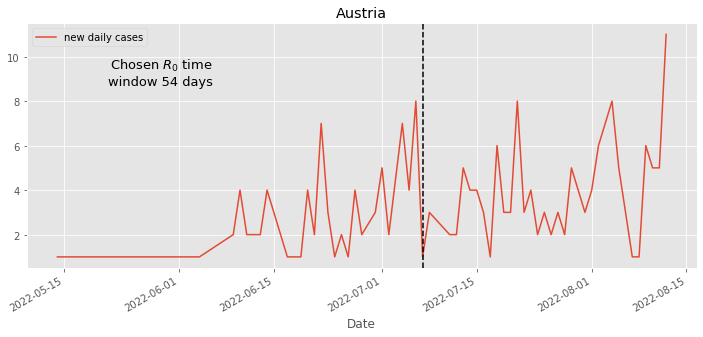

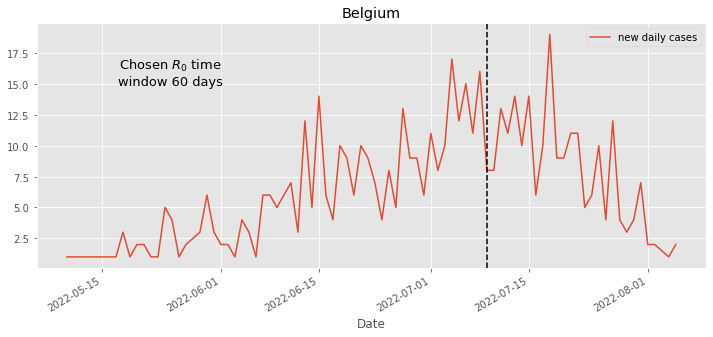

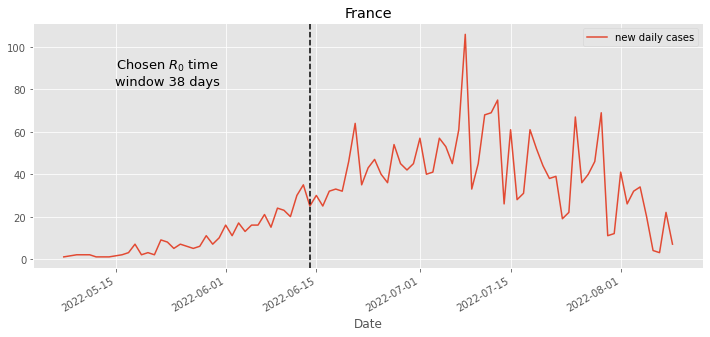

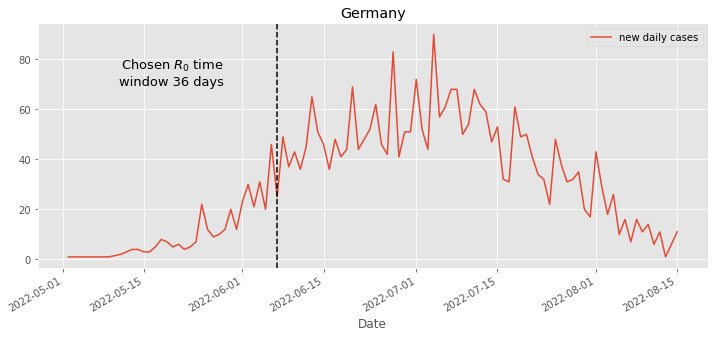

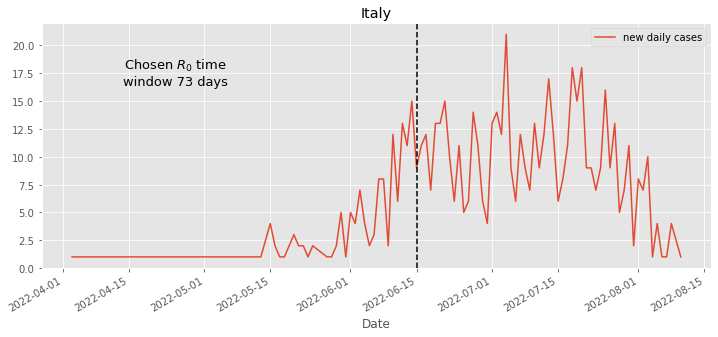

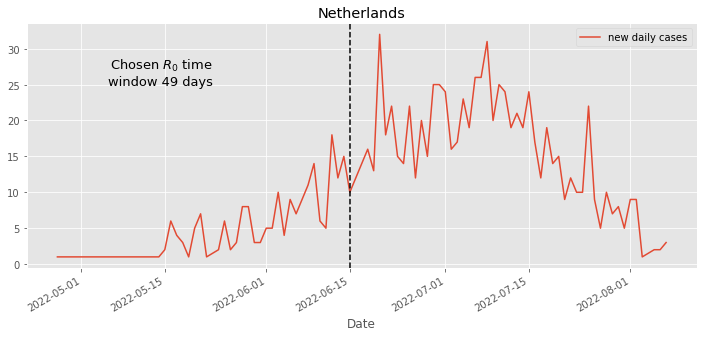

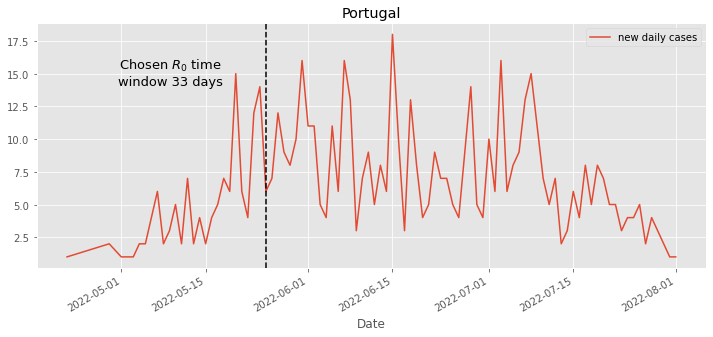

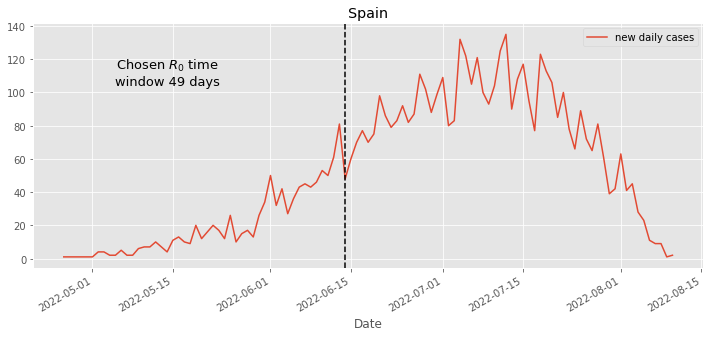

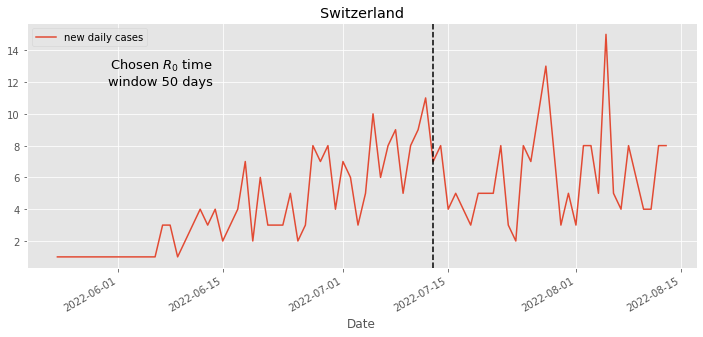

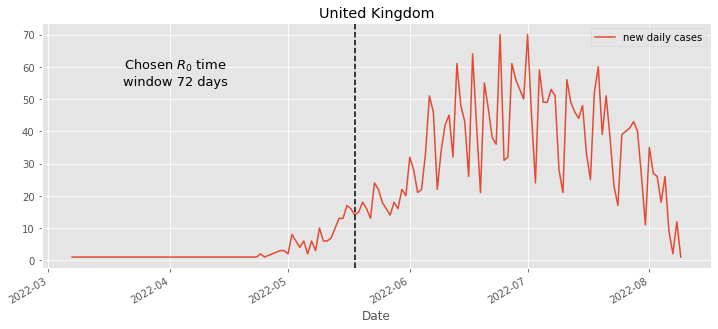

In [14]:
win_size = 14

for country in countries:
    try:
        _df = df[df.Country==country]
        with plt.style.context("ggplot"):
            fig, ax = plt.subplots(figsize=(12, 5))
            ax = _df.plot(y="Cases", title=country, ax=ax, label="new daily cases")
            u = int(DATA.loc[DATA.country==country, "length"].values[0])
            l = DATA.loc[DATA.country==country, "max_date"].values[0]
            ax.axvline(l, ls="--", color="k")
            if u < 28:
                WARNINGS.loc[WARNINGS.country==country, "length"] = "WARN"
            #xlim = plt.xlim()
            #ylim = plt.ylim()
            #lox = xlim[0]
            #loy = ylim[0]
            #height = ylim[1] - loy
            #width = l - lox
            #ax.add_patch(Rectangle((lox, loy), width, height, color="g", alpha=.05))
            #plt.xlim(xlim)
            #plt.ylim(ylim)
            #plt.text(
            #    lox+width/2, loy+2*height/3, "Chosen $R_0$ time window",
            #    ha="center", va="center", fontsize=13
            #)
            plt.text(
                .2, .8, f"Chosen $R_0$ time\nwindow {u} days",
                ha="center", va="center", fontsize=13,
                transform=ax.transAxes
            )
            plt.legend()
            fig.savefig(f"plots/figure1/Window {country}.pdf", bbox_inches="tight")
            plt.show()
    except Exception as e:
        print(country, e)

In [15]:
DATA

,country,1st cases,max incidence,missing dates,length,max_date
0,Andorra,1,1,20,NaN,NaT
1,Austria,1,11,29,54.0,2022-07-07
2,Belgium,1,19,5,60.0,2022-07-09
3,Bosnia and Herzegovina,1,1,26,NaN,NaT
4,Bulgaria,1,1,30,NaN,NaT
5,Croatia,1,3,36,NaN,NaT
6,Cyprus,1,1,0,NaN,NaT
7,Czechia,1,3,74,NaN,NaT
8,Denmark,1,9,31,NaN,NaT
9,Estonia,1,2,30,NaN,NaT


In [17]:
def estimate_R0(incidence, country, T=28,
                sh=None, ra=None,
                mu=None, sd=None,
                muLo=None, muUp=None,
                sdLo=None, sdUp=None,
                CI=.95,
                credible_intervals=[.99, .95, .90, .50],
               ):
    
    def R0_posterior(r, credible_intervals):
        R0 = pd.DataFrame()
        R0["Country"] = [country]
        a, loc, scale = sps.gamma.fit(r)
        R_dis = sps.gamma(a=a, loc=loc, scale=scale)
        R_mu = R_dis.mean()
        R_me = R_dis.median()
        R0["Mean"] = [R_mu]
        R0["Median"] = [R_me]
        quantiles = []
        for ci in credible_intervals:
            lo = (1-ci)/2
            up = 1 - lo
            quantiles.append(lo)
            quantiles.append(up)
        for q in sorted(quantiles):
            R_q = R_dis.ppf(q)
            R0[f"Quantile_{q:.3f}"] = [R_q]
        return R0
    
    def sh_ra_from_mu_sd(mu, sd):
        sh = mu**2 / sd**2
        ra = mu / sd**2
        return sh, ra
    
    # define incidence time window
    I = incidence.Cases[:T+1]
    
    # explored SI
    SIs = []
    
    # method
    # define mu parameters for Truncated Normal distribution  
    mu_mu = (muUp+muLo)/2
    mu_sd = (muUp-muLo)/2/sps.norm.ppf((1+CI)/2)
    mua, mub = (muLo - mu_mu) / mu_sd, (muUp - mu_mu) / mu_sd
    mu_d = sps.truncnorm(loc=mu_mu, scale=mu_sd, a=mua, b=mub)
    # define sd parameters for Truncated Normal distribution  
    sd_mu = (sdUp+sdLo)/2
    sd_sd = (sdUp-sdLo)/2/sps.norm.ppf((1+CI)/2)
    sda, sdb = (sdLo - sd_mu) / sd_sd, (sdUp - sd_mu) / sd_sd
    sd_d = sps.truncnorm(loc=sd_mu, scale=sd_sd, a=sda, b=sdb)
    # sample (mu,sd) pairs
    mu_rvs = mu_d.rvs(1000)
    mu_sd = []
    for mu_r in mu_rvs:
        sd_r = sd_d.rvs(1)
        while(sd_r >= mu_r):
            sd_r = sd_d.rvs(1)
        mu_sd.append([mu_r, sd_r[0]])
    mu_sd = np.array(mu_sd)
    # init R0 array
    R = np.array([])
    # alpha posterior
    a = 1 + np.sum(I[1:])
    # loop through (mu,sd) pairs
    for ms in mu_sd:
        # SI gamma distribution
        _s, _r = sh_ra_from_mu_sd(ms[0], ms[1])
        _dis = sps.gamma(a=_s, scale=1/_r)
        _dis_y = _dis.pdf(np.arange(0,T+1))
        # normalize SI distribution to sum to 1
        _dis_y /= _dis_y.sum()
        SIs.append({"x": np.arange(0,T+1), "y": _dis_y})
        # definition of w
        _w = _dis_y
        # beta prior
        b = 1
        for t in range(T)[1:]:
            # lambda
            lam = I[1:t][::-1] * _w[1:t]
            # beta posterior
            b += np.sum(lam)
        # R0 posterior
        R_dis = sps.gamma(a=a, scale=1/b)
        R = np.concatenate([R, R_dis.rvs(1000)])

    # TODO: R > DataFrame with mean, median, mode, .99, .95, .90, .50 CI intervals (+ HDI ?)
    return {"samples": R, "stats": R0_posterior(R, credible_intervals), "explored_SI": SIs}

Austria: missing 29 dates


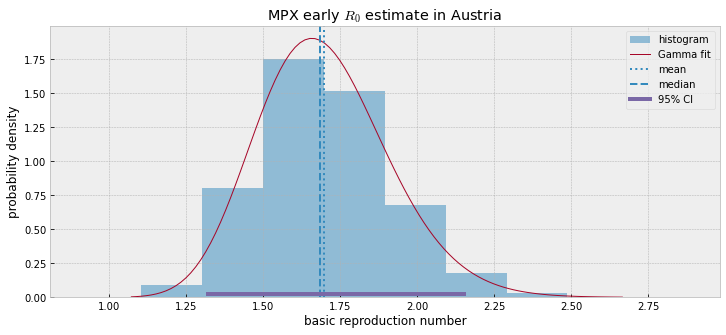

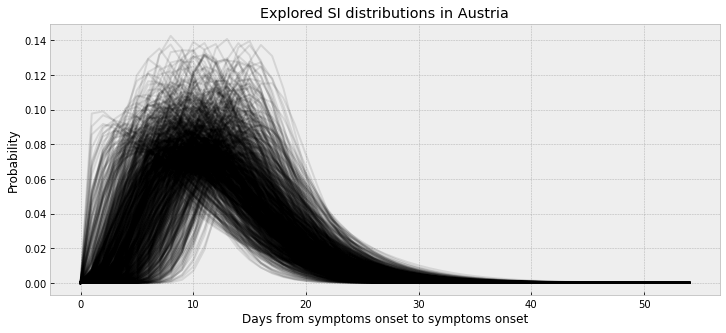

Belgium: missing 5 dates


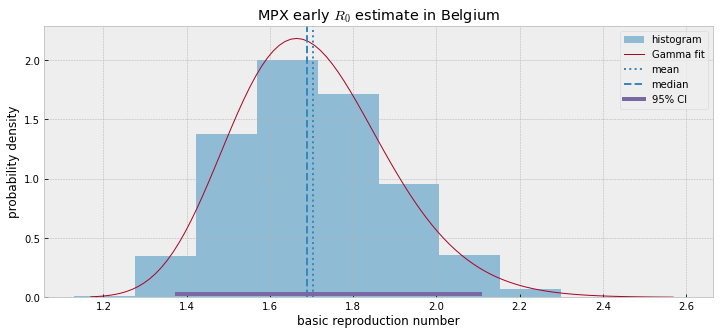

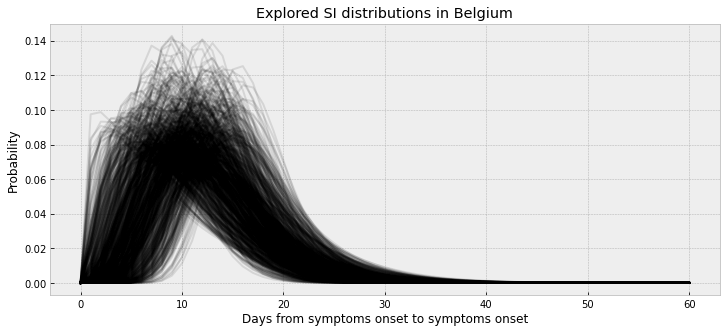

France: missing 3 dates


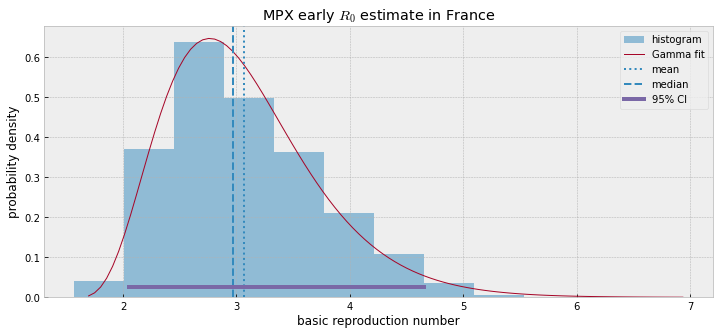

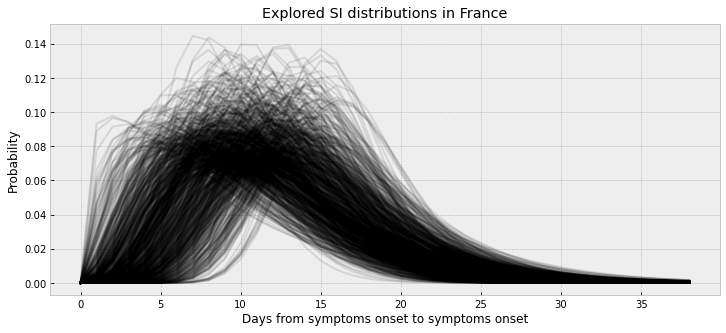

Germany: missing 8 dates


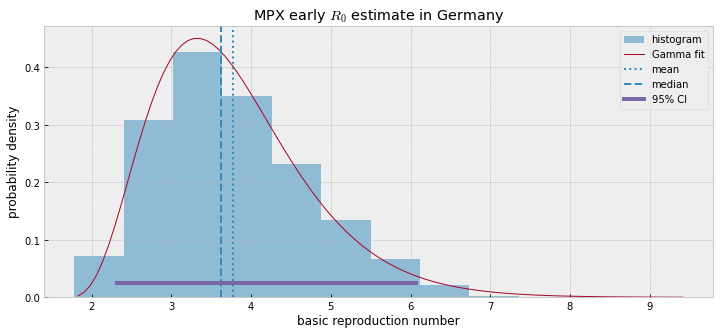

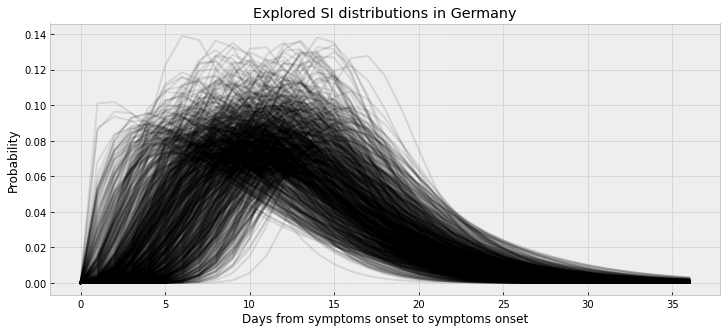

Italy: missing 42 dates


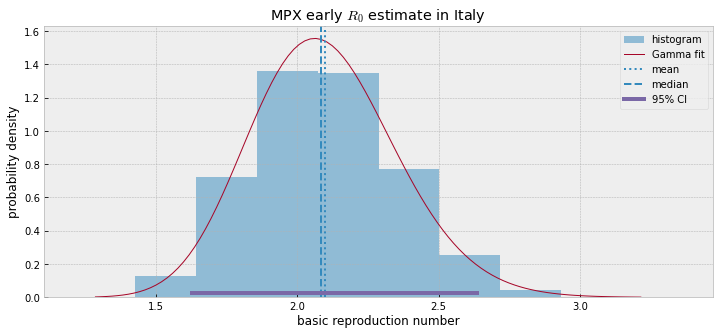

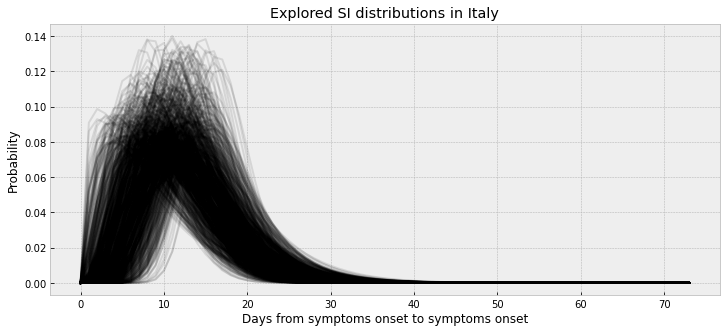

Netherlands: missing 14 dates


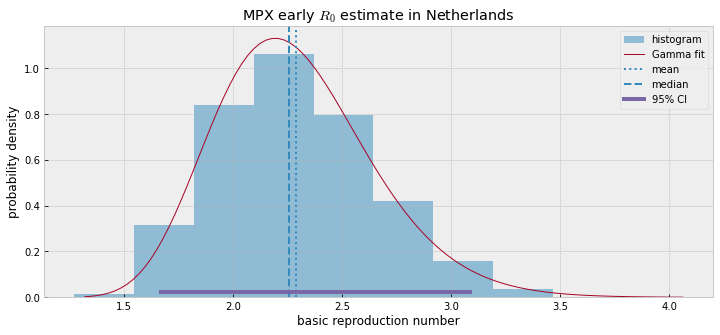

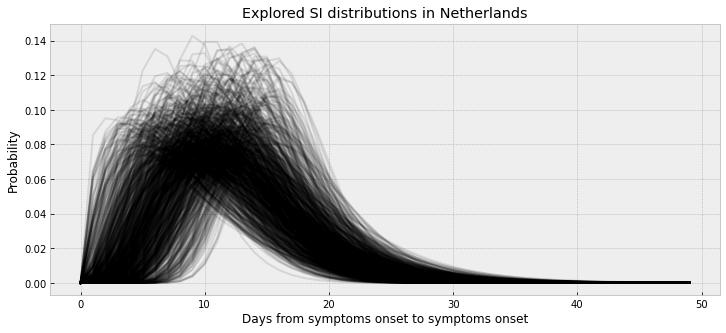

Portugal: missing 10 dates


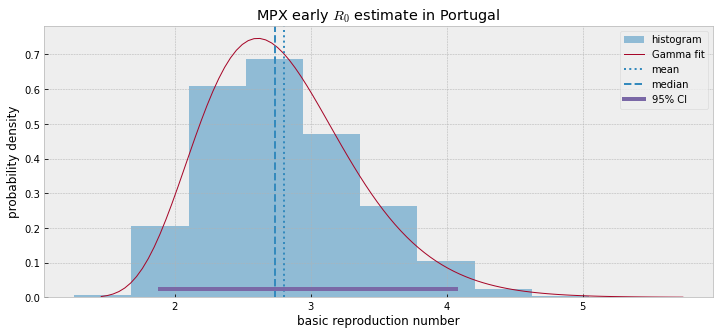

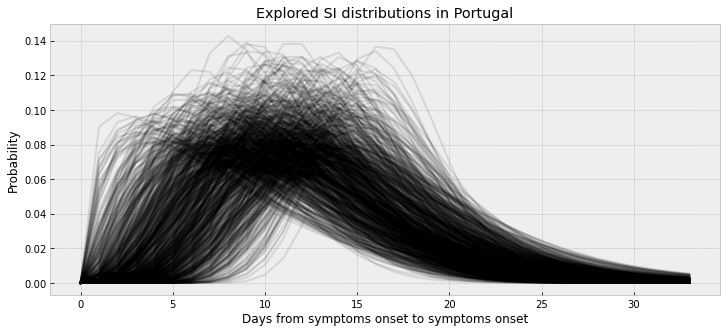

Spain: missing 3 dates


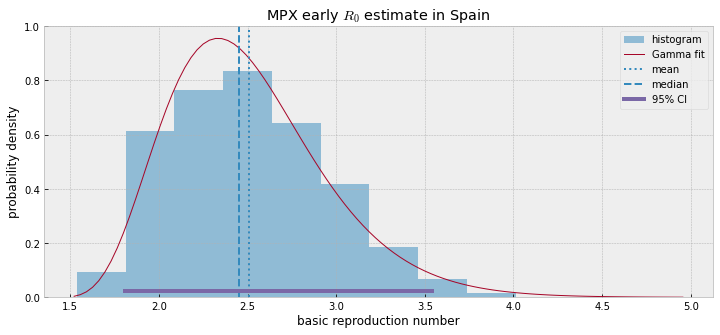

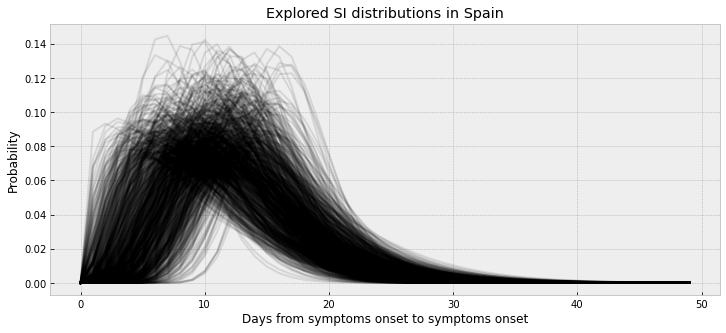

Switzerland: missing 9 dates


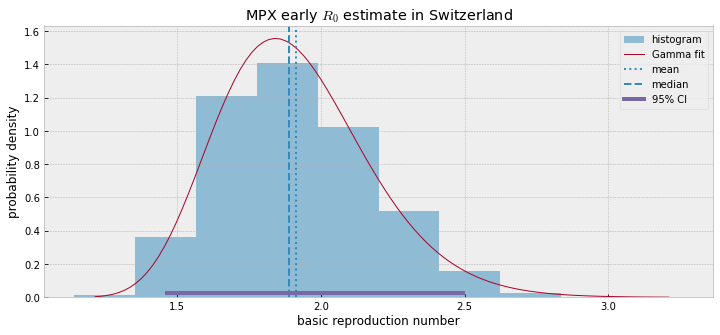

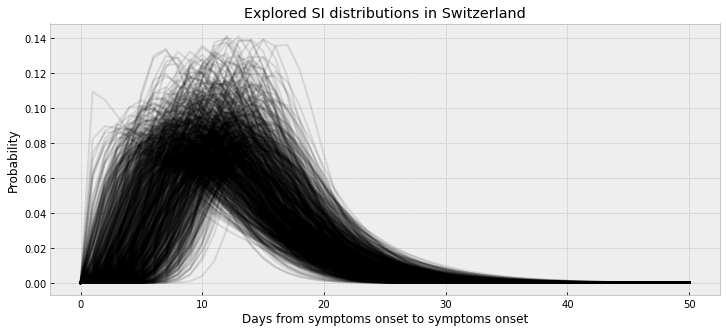

United Kingdom: missing 48 dates


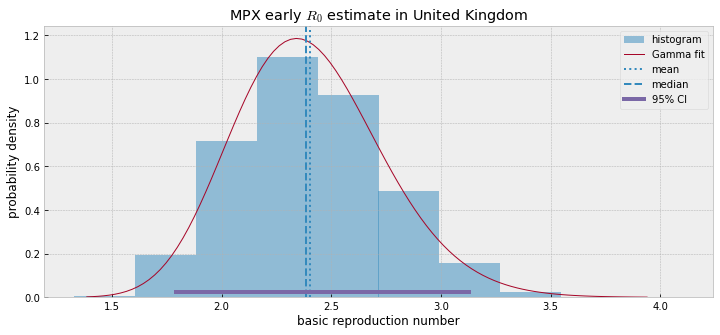

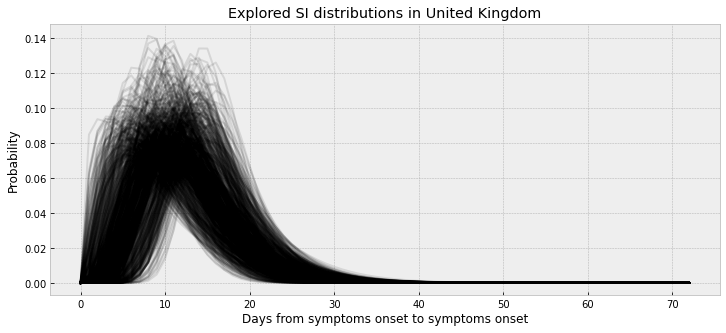

In [18]:
RR = None
Rs = []

for country in countries:
    _df = df[df.Country==country]
    missing_dates = pd.date_range(_df.index[0], _df.index[-1]).difference(
        _df.index
    )
    missing_dates_num = missing_dates.size
    print(f"{country}: missing {missing_dates_num} dates")
    if missing_dates_num:
        I = _df.resample("D").mean().interpolate(method="pchip")
        I["Cases"] = np.ceil(I.Cases).astype(int)
    else:
        I = _df

    R = estimate_R0(
        I, country,
        T=int(DATA.loc[DATA.country==country, "length"].values[0]),
        muLo=7.55, muUp=17.29,
        sdLo=2.88, sdUp=7.26
    )
    if RR is None:
        RR = R["stats"]
    else:
        RR = pd.concat([RR, R["stats"]])
    Rs = np.concatenate([Rs, R["samples"]])
    
    a, loc, scale = sps.gamma.fit(R["samples"])
    R_dis = sps.gamma(a=a, loc=loc, scale=scale)
    R_x = np.linspace(R_dis.ppf(.0001), R_dis.ppf(.9999), 100)
    R_y = R_dis.pdf(R_x)
    
    with plt.style.context("bmh"):
        fig, ax = plt.subplots(figsize=(12, 5))
        plt.hist(R["samples"], alpha=.5, density=True, label="histogram")
        plt.plot(R_x, R_y, lw=1, label="Gamma fit")
        plt.axvline(R_dis.mean(), ls=":", label="mean")
        plt.axvline(R_dis.median(), ls="--", label="median")
        R_lo = R_dis.ppf(.025)
        R_up = R_dis.ppf(.975)
        plt.plot([R_lo, R_up], [.025, .025], lw=4, label="95% CI")
        plt.legend()
        plt.title(f"MPX early $R_0$ estimate in {country}")
        plt.xlabel("basic reproduction number")
        plt.ylabel("probability density")
        fig.savefig(f"plots/figure2/R0 {country}.pdf", bbox_inches="tight")
        plt.show()
        
    with plt.style.context("bmh"):
        fig, ax = plt.subplots(figsize=(12, 5))
        for SI in R["explored_SI"]:
            plt.plot(SI["x"], SI["y"], "k", alpha=.1)
        plt.title(f"Explored SI distributions in {country}")
        plt.xlabel("Days from symptoms onset to symptoms onset")
        plt.ylabel("Probability")
        fig.savefig(f"plots/figure3/SI_{country}.pdf", bbox_inches="tight")
        plt.show()

In [19]:
RR

,Country,Mean,Median,Quantile_0.005,Quantile_0.025,Quantile_0.050,Quantile_0.250,Quantile_0.750,Quantile_0.950,Quantile_0.975,Quantile_0.995
0,Austria,1.698523,1.685157,1.225522,1.320532,1.372643,1.548587,1.833901,2.070004,2.152437,2.321898
0,Belgium,1.703114,1.690088,1.296254,1.376062,1.420253,1.571270,1.820772,2.030418,2.104150,2.256462
0,France,3.068513,2.968579,1.886549,2.050229,2.154421,2.575600,3.453033,4.323829,4.653140,5.365423
0,Germany,3.773403,3.625152,2.087822,2.315779,2.462260,3.060894,4.325161,5.590774,6.071046,7.112006
0,Italy,2.097327,2.085368,1.498920,1.625504,1.693509,1.917069,2.264554,2.541940,2.637092,2.830379
0,Netherlands,2.288350,2.256653,1.529793,1.669590,1.748959,2.028820,2.513384,2.935897,3.087076,3.402928
0,Portugal,2.799939,2.736793,1.706875,1.888364,1.995808,2.394502,3.136733,3.819595,4.069823,4.600646
0,Spain,2.509751,2.451783,1.682376,1.808907,1.886323,2.185087,2.771461,3.331064,3.539337,3.985456
0,Switzerland,1.912650,1.889075,1.363800,1.464191,1.521360,1.723696,2.075949,2.384385,2.494957,2.726256
0,United Kingdom,2.403370,2.383083,1.639184,1.794342,1.879078,2.163602,2.621039,2.996875,3.127641,3.395839


In [20]:
RRc = RR.copy(deep=True)
RRc.columns = RRc.columns.str.replace("Quantile_", "Q_")

In [21]:
RRc.set_index("Country").round(2).to_csv("R0.csv")

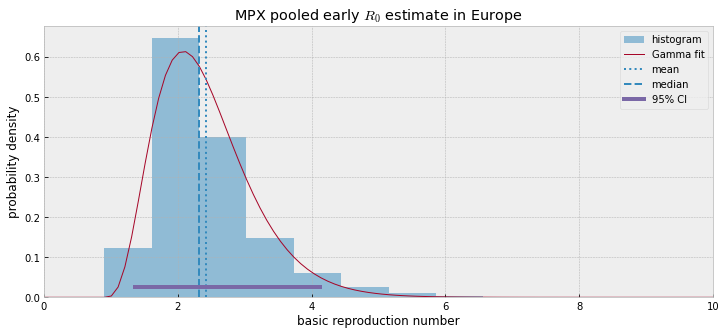

In [22]:
with plt.style.context("bmh"):
    fig, ax = plt.subplots(figsize=(12, 5))
    plt.hist(Rs, alpha=.5, density=True, label="histogram")
    a, loc, scale = sps.gamma.fit(Rs)
    Rs_d = sps.gamma(a=a, loc=loc, scale=scale)
    Rs_x = np.linspace(0, 10, 100)
    Rs_y = Rs_d.pdf(Rs_x)
    plt.plot(Rs_x, Rs_y, lw=1, label="Gamma fit")
    plt.axvline(Rs_d.mean(), ls=":", label="mean")
    plt.axvline(Rs_d.median(), ls="--", label="median")
    Rs_lo = Rs_d.ppf(.025)
    Rs_up = Rs_d.ppf(.975)
    plt.plot([Rs_lo, Rs_up], [.025, .025], lw=4, label="95% CI")
    plt.legend()
    plt.title("MPX pooled early $R_0$ estimate in Europe")
    plt.xlabel("basic reproduction number")
    plt.ylabel("probability density")
    plt.xlim([0, 10])
    fig.savefig("plots/figure0/R0_EU.pdf", bbox_inches="tight")
    plt.show()

In [23]:
np.round(Rs_d.mean(),2), np.round(Rs_d.median(),2), np.round(Rs_d.ppf(.025),2), np.round(Rs_d.ppf(.975), 2)

(2.43, 2.31, 1.36, 4.13)

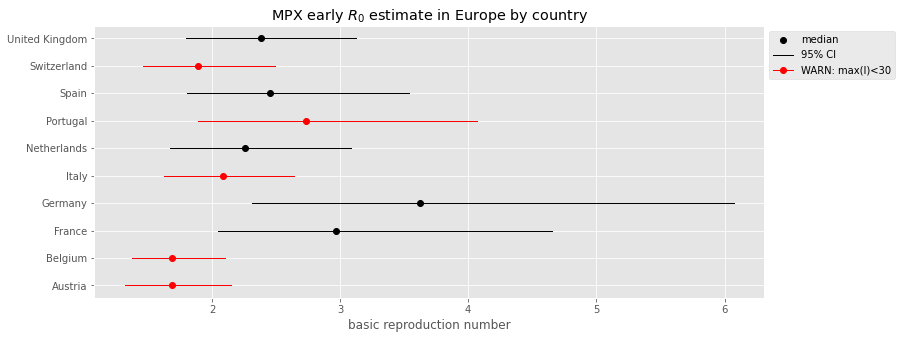

In [24]:
with plt.style.context("ggplot"):
    fig, ax = plt.subplots(figsize=(12, 5))
    for c in RR.Country.unique():
        _R = RR[RR.Country==c]
        color = "k"
        ls = "-"
        if WARNINGS[WARNINGS.country==c]["max incidence"].values[0] == "WARN":
            color = "r"
        if WARNINGS[WARNINGS.country==c].length.values[0] == "WARN":
            ls = "--"
        ax.plot(_R.Median, c, 'o', c=color)
        ax.plot(
            [_R["Quantile_0.025"].values[0], _R["Quantile_0.975"].values[0]], [c, c], 
            lw=1, color=color, ls=ls)
        plt.title("MPX early $R_0$ estimate in Europe by country")
    plt.xlabel("basic reproduction number")
    legend = [
        Line2D([0], [0], marker='o', color='k', label='median', markerfacecolor='k', lw=0),
        Line2D([0], [0], color='k', label='95% CI', markerfacecolor='k', lw=1),
        #Line2D([0], [0], color='k', label='WARN: length<28', lw=1, ls="--"),
        Line2D([0], [0], marker='o', color='r', label='WARN: max(I)<30', markerfacecolor='r', lw=1),
    ]
    plt.legend(handles=legend, loc="upper left", bbox_to_anchor=(1,1))
    fig.savefig("plots/figure0/R0_countries.pdf", bbox_inches="tight")
    plt.show()

In [25]:
string = ""
for c in countries.values:
    string += c+", "
string

'Austria, Belgium, France, Germany, Italy, Netherlands, Portugal, Spain, Switzerland, United Kingdom, '

In [26]:
countries.size

10

In [27]:
DATA.columns

Index(['country', '1st cases', 'max incidence', 'missing dates', 'length',
       'max_date'],
      dtype='object')

In [28]:
DW = pd.DataFrame()

In [29]:
DW["country"] = DATA.country

In [30]:
DW["1st cases"] = DATA["1st cases"].astype(str) + " " + WARNINGS["1st cases"]

In [31]:
DW["max incidence"] = DATA["max incidence"].astype(str) + " " + WARNINGS["max incidence"]

In [32]:
DW["missing dates"] = DATA["missing dates"].astype(str) + " " + WARNINGS["missing dates"]

In [33]:
DW["length"] = DATA["length"].astype(str) + " " + WARNINGS["length"]

In [34]:
DW.set_index("country")

,1st cases,max incidence,missing dates,length
country,,,,
Andorra,1,1 ERR,20 WARN,nan
Austria,1,11 WARN,29 WARN,54.0
Belgium,1,19 WARN,5 WARN,60.0
Bosnia and Herzegovina,1,1 ERR,26 WARN,nan
Bulgaria,1,1 ERR,30 WARN,nan
Croatia,1,3 ERR,36 WARN,nan
Cyprus,1,1 ERR,0,nan
Czechia,1,3 ERR,74 WARN,nan
Denmark,1,9 ERR,31 WARN,nan


In [35]:
DW.to_csv("countries.csv")

In [36]:
# test

In [37]:
de = pd.read_csv("Germany_1918.csv", parse_dates=["Date"], index_col="Date")

In [38]:
de

,Cases
Date,
1918-09-29,10
1918-09-30,4
1918-10-01,4
1918-10-02,19
1918-10-03,6
...,...
1919-01-28,15
1919-01-29,11
1919-01-30,3


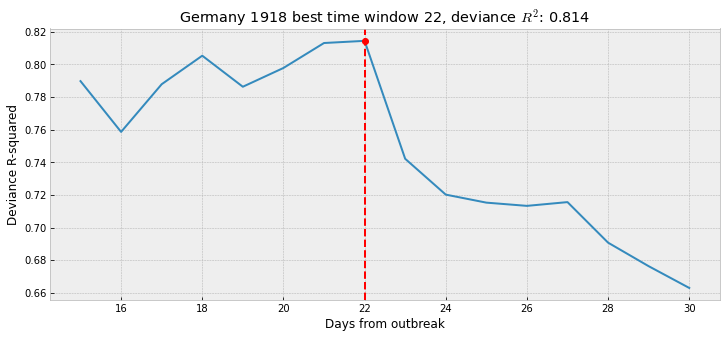

In [39]:
index = sensitivity_analysis(
    de, "Germany 1918",
    Ts=de.reset_index().Cases.idxmax(),
    minT=de.reset_index().Cases.idxmax()//2,
    muLo=7.55, muUp=17.29,
    sdLo=2.88, sdUp=7.26
)

In [40]:
index

([0.7897737710390094,
  0.7586381221307494,
  0.7878744704218879,
  0.805366794314631,
  0.786331484067528,
  0.7978398652643134,
  0.8131466435169292,
  0.8144722601750575,
  0.7421594782849458,
  0.7201766325581782,
  0.7152623927182868,
  0.7132784210263905,
  0.7155815680457718,
  0.6907186722831709,
  0.6762885656447235,
  0.6629430633331681],
 22)

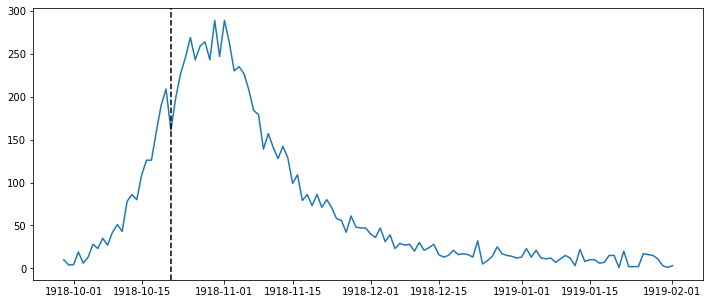

In [41]:
fig, ax = plt.subplots(figsize=(12, 5))
plt.plot(de)
plt.axvline(de.index[index[1]], color="k", ls="--")

missing 0 dates


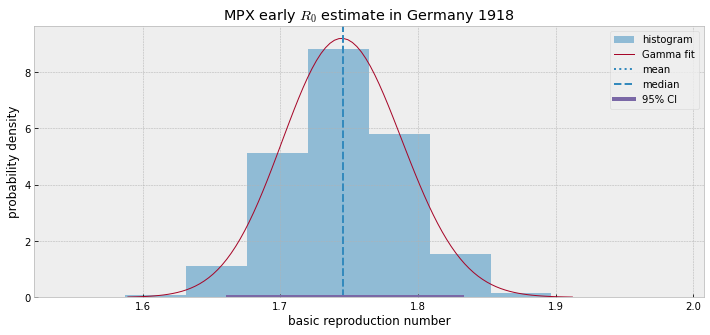

In [42]:
missing_dates = pd.date_range(de.index[0], de.index[-1]).difference(
    de.index
)
missing_dates_num = missing_dates.size
print(f"missing {missing_dates_num} dates")
if missing_dates_num:
    I = de.resample("D").mean().interpolate(method="pchip")
    I["Cases"] = np.ceil(I.Cases).astype(int)
else:
    I = de

R = estimate_R0(
    I, "Germany 1918",
    T=index[1],
    muLo=2.99, muUp=3.01,
    sdLo=1.49, sdUp=1.51
)

a, loc, scale = sps.gamma.fit(R["samples"])
R_dis = sps.gamma(a=a, loc=loc, scale=scale)
R_x = np.linspace(R_dis.ppf(.0001), R_dis.ppf(.9999), 100)
R_y = R_dis.pdf(R_x)

with plt.style.context("bmh"):
    fig, ax = plt.subplots(figsize=(12, 5))
    plt.hist(R["samples"], alpha=.5, density=True, label="histogram")
    plt.plot(R_x, R_y, lw=1, label="Gamma fit")
    plt.axvline(R_dis.mean(), ls=":", label="mean")
    plt.axvline(R_dis.median(), ls="--", label="median")
    R_lo = R_dis.ppf(.025)
    R_up = R_dis.ppf(.975)
    plt.plot([R_lo, R_up], [.025, .025], lw=4, label="95% CI")
    plt.legend()
    plt.title(f"MPX early $R_0$ estimate in Germany 1918")
    plt.xlabel("basic reproduction number")
    plt.ylabel("probability density")
    plt.show()

In [43]:
R_dis.mean(), R_dis.median(), R_dis.ppf(.025), R_dis.ppf(.975)

(1.7457757814871528,
 1.7453879088080977,
 1.6618364451112217,
 1.8319193463104355)

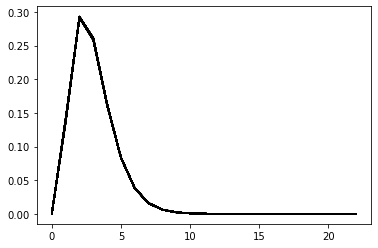

In [44]:
for si in R["explored_SI"]:
    plt.plot(si["x"], si["y"], "k", alpha=.1)